In [1]:
# cd /content/drive/My Drive/Праки

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
from scipy.optimize import minimize, curve_fit

In [14]:
ls

 ’®¬ ў гбва®©бвўҐ C Ё¬ҐҐв ¬ҐвЄг Win_10
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 865D-8485

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\ћ§Ґа\education\Їа®ў « ¬Ґ­¤Ґ«п

23.11.2020  16:23    <DIR>          .
23.11.2020  16:23    <DIR>          ..
23.11.2020  16:23    <DIR>          .ipynb_checkpoints
19.10.2020  16:04            12я254 1_5.txt
19.10.2020  16:48            43я614 2_1_no_filter.txt
19.10.2020  16:36            92я955 2_1F810.txt
19.10.2020  18:36            41я628 3_2Filter.txt
19.10.2020  17:49            42я206 3_2no_filter.txt
23.11.2020  16:21           516я665 Praktikum_2_1 (3).ipynb
23.11.2020  16:23            55я766 Praktikum_2_utro_chetverg (2).xlsx
23.11.2020  16:23             1я082 Proval_mendel.ipynb
               8 д ©«®ў        806я170 Ў ©в
               3 Ї Ї®Є  30я794я276я864 Ў ©в бў®Ў®¤­®


In [59]:
def read_data(exp_number, col_num = 2, gap = 0):
  df1 = pd.read_excel('DATA.xlsx', sheet_name='Лист'+str(exp_number))
  df1 = df1[list(df1.columns[:col_num])]
  if gap !=0:
    df1 = df1.drop(df1.columns[list(np.array(range(gap))+1)], axis = 'columns')
  df1['Град'] = df1['Град'].astype(int)
  return df1

In [60]:
def prepare_data(df, y_col = 1): 
  df = df.dropna()
  return 2*np.pi*df[df.columns[0]].values/360, ((df[df.columns[y_col]]-0.043)/20).values

In [61]:
def sin_func(x,A,w,phi,b):
  return A*np.sin(w*x+phi)+b

A0 = 0.15
w0 = 2
phi0 = np.pi/2
b0 = 0.15
init_params = [A0,w0,phi0,b0]

In [62]:
def approximate(func, x_data, y_data, init_params):
  sin_func = func
  popt, pcov = curve_fit(sin_func, x_data, y_data, p0 = init_params)
  perr = np.sqrt(np.diag(pcov))
  params = popt

  fig, ax = plt.subplots()
  ax.grid()
  ax.set_xlabel('Доля от числа Pi')
  ax.set_ylabel('Интенсивность, мВт')
  ax.scatter(x_data,y_data)
  x = np.linspace(0,6.5,100)
  ax.plot(x,sin_func(x,*params))
  plt.show()

  print('Общий вид функции: A*np.sin(w*x+phi)+b')
  print('Общий вид параметров: [A,w,phi,b]')
  print('Оптимальные параметры:' + str(popt))
  print('ошибка определения:' + str(perr))

  return popt, pcov, perr

In [63]:
def find_id_param(popt, polar='linear'):
  ideal_params = popt.copy()
  ideal_params[1] = round(ideal_params[1])
  if polar == 'linear':
    ideal_params[0] = ideal_params[3]
  elif polar == 'r' or polar == 'l':
    ideal_params[0] = 0
  else:
    ideal_params[0] =  ideal_params[3]*np.cos(polar/180*np.pi)**2
  
  return ideal_params

In [64]:
def plot_all(func, x_data, y_data, popt, ideal_params):

  fig, ax = plt.subplots()
  # ax2=fig.add_subplot(111, label="1")
  ax.grid()
  ax.set_xlabel('Доля от числа Pi')
  ax.set_ylabel('Интенсивность, мВт')
  ax.scatter(x_data,y_data)
  x = np.linspace(0,6.5,100)
  ax.plot(x,sin_func(x,*popt), label = 'optim')
  ax.plot(x,sin_func(x,*ideal_params), label = 'real')
  ax.legend()
  plt.show()
  


In [65]:
def compil_list(list_num, gap = 0,col_num = 2, polar = 'linear'):
  df1 = read_data(list_num, gap = gap,col_num = col_num)
  df1.head(20).T
  x_data, y_data = prepare_data(df1)

  popt, pcov, perr = approximate(sin_func, x_data, y_data, init_params)
  ideal_params = find_id_param(popt, polar = polar)

  plot_all(sin_func, x_data, y_data, popt, ideal_params)
  plt.show()

  I_min = popt[3] - popt[0]
  I_max = popt[3] + popt[0]

  I_min_err = perr[3] + perr[0]
  I_max_err = perr[3] + perr[0]

  Phi_ang = abs(popt[2] - np.pi/2) # неточность выставления нуля
  Phi_zero_err = perr[2] # точность определения фазы

  Phi_real = 2*np.arccos(np.sqrt(I_min/I_max))
  Phi_real_err = 1/np.sqrt(1 - I_min/I_max)*np.sqrt(I_min/I_max)*np.sqrt((np.sqrt(I_min_err/I_min))**2 + (np.sqrt(I_max_err/I_max))**2)
  return I_min, I_max, I_min_err, I_max_err, Phi_real, Phi_real_err


In [66]:
df1 = read_data(1)
df1.head(20).T

0      1      2      3     4      5      6      7      8  \
Град             0.0   20.0   40.0   60.0  80.0  100.0  120.0  140.0  160.0   
Интенсивность  664.0  555.0  347.0  132.0  10.0   42.0  196.0  420.0  597.0   

                   9     10     11     12     13     14     15     16     17  \
Град           180.0  200.0  220.0  240.0  260.0  280.0  300.0  320.0  340.0   
Интенсивность  653.0  551.0  351.0  137.0   12.0   36.0  205.0  425.0  611.0   

                  18  
Град           360.0  
Интенсивность    NaN

In [67]:
x_data, y_data = prepare_data(df1)

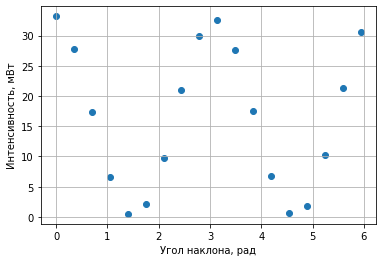

In [68]:
fig, ax = plt.subplots()

ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Угол наклона, рад')
ax.set_ylabel('Интенсивность, мВт')
ax.scatter(x_data, y_data)

plt.show()

In [69]:
A0 = 15
w0 = 2
phi0 = np.pi/2
b0 = 15
init_params = [A0,w0,phi0,b0]

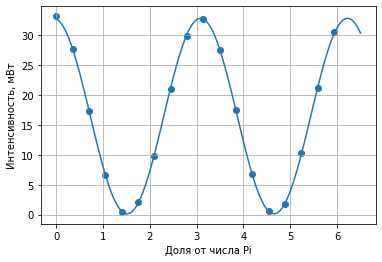

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[16.37365617  2.0020561   1.68131427 16.49226   ]
ошибка определения:[0.0759772  0.00284473 0.00991405 0.05795143]


In [70]:
popt, pcov, perr = approximate(sin_func, x_data, y_data, init_params)

In [71]:
ideal_params = find_id_param(popt)

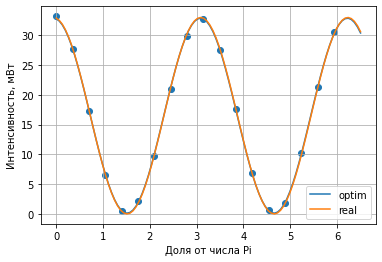

In [72]:
plot_all(sin_func, x_data, y_data, popt, ideal_params)

поляризация 45 градусов

In [73]:
df1 = read_data(2)
df1.head(20).T

x_data, y_data = prepare_data(df1)

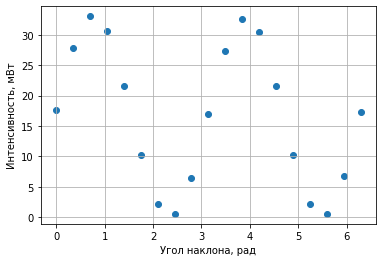

In [74]:
fig, ax = plt.subplots()

ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('Угол наклона, рад')
ax.set_ylabel('Интенсивность, мВт')
ax.scatter(x_data, y_data)

plt.show()

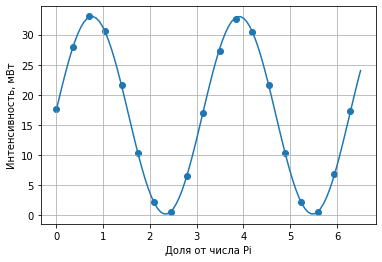

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[16.38714788  1.99831761  0.04633315 16.61560352]
ошибка определения:[0.05961008 0.00170714 0.00639569 0.04095323]


In [75]:
popt, pcov, perr = approximate(sin_func, x_data, y_data, init_params)
ideal_params = find_id_param(popt)

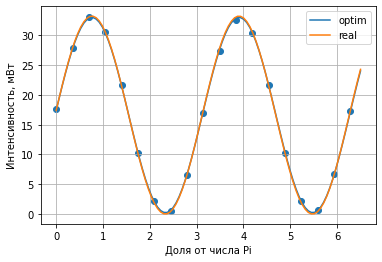

In [76]:
plot_all(sin_func, x_data, y_data, popt, ideal_params)

По идее тут должны быть аналогичные измерения для 90 и -45 градусов, но у нас почему-то нет этих экспериментальных данных
(???????)

__Упражнение 2__ (Ly/4)

Праоциркулярная поляризация

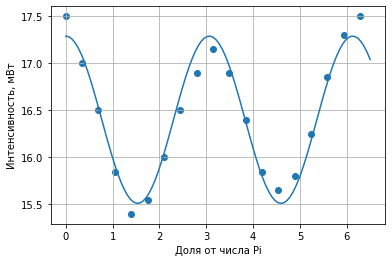

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[ 0.88865545  2.05221718  1.56337034 16.39790526]
ошибка определения:[0.04548075 0.03272683 0.11547845 0.0350433 ]


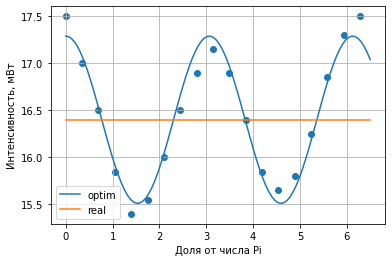

(15.509249802243739,
 17.28656070819561,
 0.08052405248867255,
 0.08052405248867255,
 0.6528252996532538,
 0.29318111697116794)

In [77]:
compil_list(3, polar = 'r')

левоциркулярная поляризация

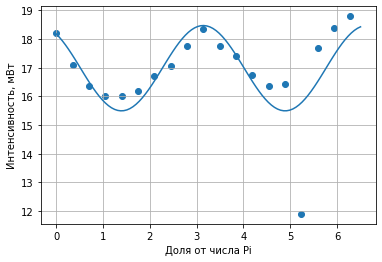

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[ 1.48890502  1.79759687  2.2075432  16.98349978]
ошибка определения:[0.39440957 0.13758123 0.49750848 0.29272999]


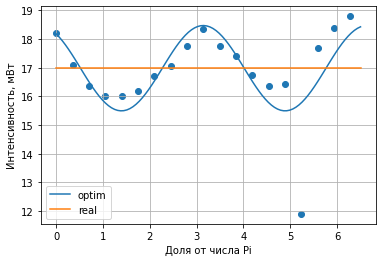

(15.49459475761493,
 18.472404799291734,
 0.6871395606266314,
 0.6871395606266314,
 0.8263106087784343,
 0.6513896528799893)

In [78]:
compil_list(4, polar = 'l')

Поляризация 20 град

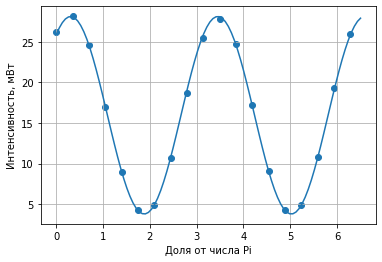

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[12.1570636   1.99995475  0.9519793  15.95585785]
ошибка определения:[0.06712392 0.00313394 0.01178655 0.04981999]


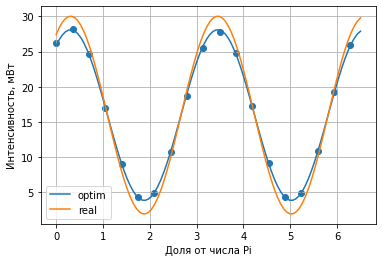

In [79]:
I_min, I_max, I_min_err, I_max_err, Phi_real, Phi_real_err = compil_list(5, polar = 20)

__НУЖНО ОПРЕДЕЛИТЬ ПАРАМЕТРЫ (два угла эллипса) и построить траекторию!!!__

__Упражнене 3:__

лазер

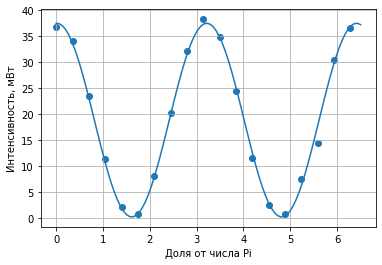

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[18.67628203  1.96406544  1.53880697 18.84629855]
ошибка определения:[0.35402257 0.0117254  0.04233246 0.27361667]


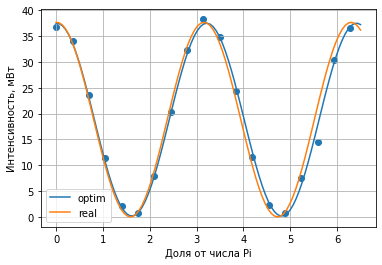

In [80]:
I_min, I_max, I_min_err, I_max_err, Phi_real, Phi_real_err = compil_list(6, polar = 'linear')

__Нужно найти параметры стокса из I_min, I_max!!!__

диод

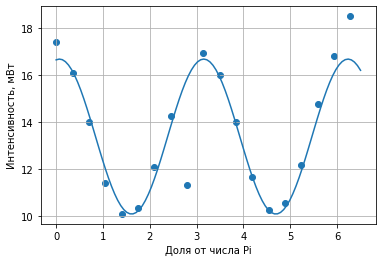

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[ 3.29578045  2.03917991  1.42799606 13.37897981]
ошибка определения:[0.42111111 0.08243583 0.29270201 0.32626726]


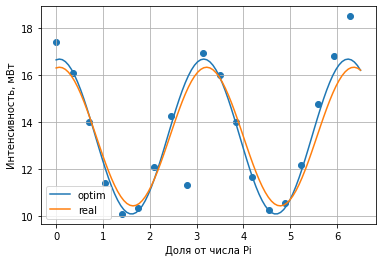

In [81]:
I_min, I_max, I_min_err, I_max_err, Phi_real, Phi_real_err = compil_list(7, polar = 62)

Получаем частично поляризованный свет. Если смотреть по интенсивностям, то степень поляризации такая же как у эллиптической поляризации под углом 62 градуса. Надо вычислить

__Нужно найти параметры стокса из I_min, I_max и сравнить их с полученными экспериментально далее в упражнении (данные на листе 8 в excel таблице для диода и для лазера)!!!__

__Упражнение 4:__

Теоретическую часть пражнения 5 здесь я не писал. Начал с проекционных измерений

диод

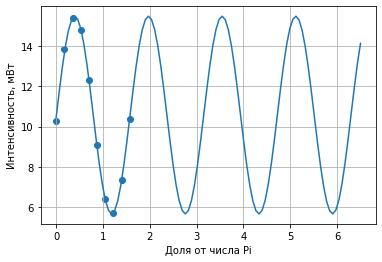

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[ 4.88814277  3.99486207 -0.02119382 10.57004405]
ошибка определения:[0.05925606 0.01957713 0.01879528 0.03955586]


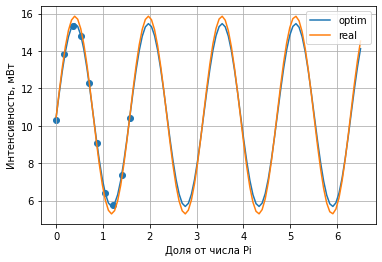

In [82]:
I_min, I_max, I_min_err, I_max_err, Phi_real, Phi_real_err = compil_list(11, polar = 45)

лазер

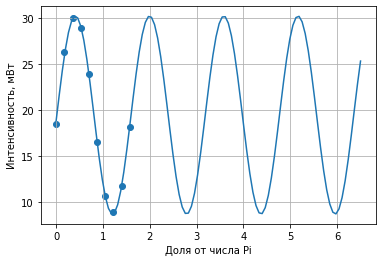

Общий вид функции: A*np.sin(w*x+phi)+b
Общий вид параметров: [A,w,phi,b]
Оптимальные параметры:[10.77828896  3.96371343 -0.05492503 19.4805251 ]
ошибка определения:[0.12883621 0.0195222  0.01854154 0.08616561]


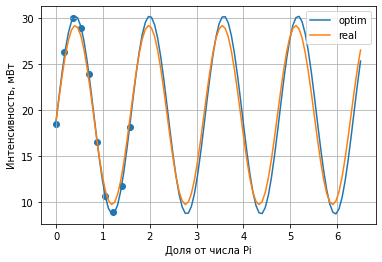

In [83]:
I_min, I_max, I_min_err, I_max_err, Phi_real, Phi_real_err = compil_list(11,gap = 1, col_num = 3, polar = 45)